### Importing headers

In [4]:
from PIL import Image
import glob
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import csv

In [7]:
# Read sorted file list

csv_file_path_temp = "/home/adminuser/Documents/cam_test/test_data_dir/test6_2.csv"
csv_file_path_motion = "/home/adminuser/Documents/cam_test/test_data_dir/test6_0.csv"

sorted_file_path_temperature = []
sorted_file_path_motion = []

# Open the CSV file in read mode
with open(csv_file_path_temp, mode='r') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Read each row from the CSV file
    for row in reader:
        # 'row' is a list representing a row in the CSV file
        sorted_file_path_temperature.append(row)

# Open the CSV file in read mode
with open(csv_file_path_motion, mode='r') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Read each row from the CSV file
    for row in reader:
        # 'row' is a list representing a row in the CSV file
        sorted_file_path_motion.append(row)



In [5]:
sorted_file_path_motion

[['/home/adminuser/Documents/cam_test/test6/020231121170746.png'],
 ['/home/adminuser/Documents/cam_test/test6/020231121171243.png'],
 ['/home/adminuser/Documents/cam_test/test6/020231121171741.png'],
 ['/home/adminuser/Documents/cam_test/test6/020231121172238.png'],
 ['/home/adminuser/Documents/cam_test/test6/020231121172736.png'],
 ['/home/adminuser/Documents/cam_test/test6/020231121173233.png'],
 ['/home/adminuser/Documents/cam_test/test6/020231121173731.png'],
 ['/home/adminuser/Documents/cam_test/test6/020231121174228.png'],
 ['/home/adminuser/Documents/cam_test/test6/020231121174726.png'],
 ['/home/adminuser/Documents/cam_test/test6/020231121175224.png'],
 ['/home/adminuser/Documents/cam_test/test6/020231121175721.png'],
 ['/home/adminuser/Documents/cam_test/test6/020231121180219.png'],
 ['/home/adminuser/Documents/cam_test/test6/020231121180716.png'],
 ['/home/adminuser/Documents/cam_test/test6/020231121181214.png'],
 ['/home/adminuser/Documents/cam_test/test6/020231121181711.pn

#### Extract date and time from file name


In [6]:
# Function for get data from file parth
# Return camera index

def get_data_from_file_name(full_file_name):

    directory, filename = os.path.split(full_file_name)
    filename, file_extension = os.path.splitext(filename)

    #print("Directory:", directory)     # Print the parts
    #print("Filename:", filename)
    #print("File Extension:", file_extension)

        # Split file name to cam index and time stand data
    start_positions = [0, 1, 5, 7,9, 11,13]  # Starting positions (inclusive)
    end_positions   = [1, 5, 7, 9,11,13,15]  # Ending positions (exclusive)

    custom_ranges = [filename[start:end] for start, end in zip(start_positions, end_positions)]
    
    file_cam_index = int(custom_ranges[0])
    file_year   = int(custom_ranges[1])
    file_month  = int(custom_ranges[2])
    file_date   = int(custom_ranges[3])
    file_hour   = int(custom_ranges[4])
    file_min    = int(custom_ranges[3])
    file_sec    = int(custom_ranges[4])

    return file_cam_index,file_year,file_month,file_date,file_hour,file_min,file_sec 


### Movement anlysis

In [61]:

def image_dif_color(index_1,index_2):

    image_1_dir = sorted_file_path_motion[index_1]
    image_2_dir = sorted_file_path_motion[index_2]

    image1 = cv2.imread(image_1_dir[0], cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image_2_dir[0], cv2.IMREAD_GRAYSCALE)
    print(image1.shape)

    new_imege = np.zeros(image1.shape)
    new_imege_1 = np.zeros(image1.shape)
    i=0
    for i in range(0,479):
        new_imege[i+1,:] = image1[i,:]


    new_imege_1 = image2 - new_imege

    image1_rgb = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)



    fig, axes = plt.subplots(1,3 , figsize=(15, 5))  # 1 row, 3 columns
    axes[0].imshow(image1_rgb)
    #axes[0].axis('off')
    axes[0].set_title(index_1)
    axes[1].imshow(image2_rgb)
    #axes[1].axis('off')
    axes[1].set_title(index_2)

    axes[2].imshow(new_imege_1)
    #axes[2].axis('off')
    axes[2].set_title('new image')


    # Adjust layout for better visualization
    plt.tight_layout()
    # Display the subplots
    plt.show()

    return 0


def image_def_gray(index_1,index_2):

    image_1_dir = sorted_file_path_motion[index_1]
    image_2_dir = sorted_file_path_motion[index_2]

    image1 = cv2.imread(image_1_dir[0], cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image_2_dir[0], cv2.IMREAD_GRAYSCALE)
    print(image1.shape)


    new_imege_1 = image2 - image1

    image1_rgb = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
    new_imege_1_rgb = cv2.cvtColor(new_imege_1,cv2.COLOR_BGR2RGB)


    fig, axes = plt.subplots(1,3 , figsize=(15, 5))  # 1 row, 3 columns
    axes[0].imshow(image1_rgb)
    #axes[0].axis('off')
    axes[0].set_title(index_1)
    
    axes[1].imshow(image2_rgb)
    #axes[1].axis('off')
    axes[1].set_title(index_2)

    axes[2].imshow(new_imege_1_rgb)
    #axes[2].axis('off')
    axes[2].set_title('new image')


    # Adjust layout for better visualization
    plt.tight_layout()
    # Display the subplots
    plt.show()

    return 0




### Creating image sequances

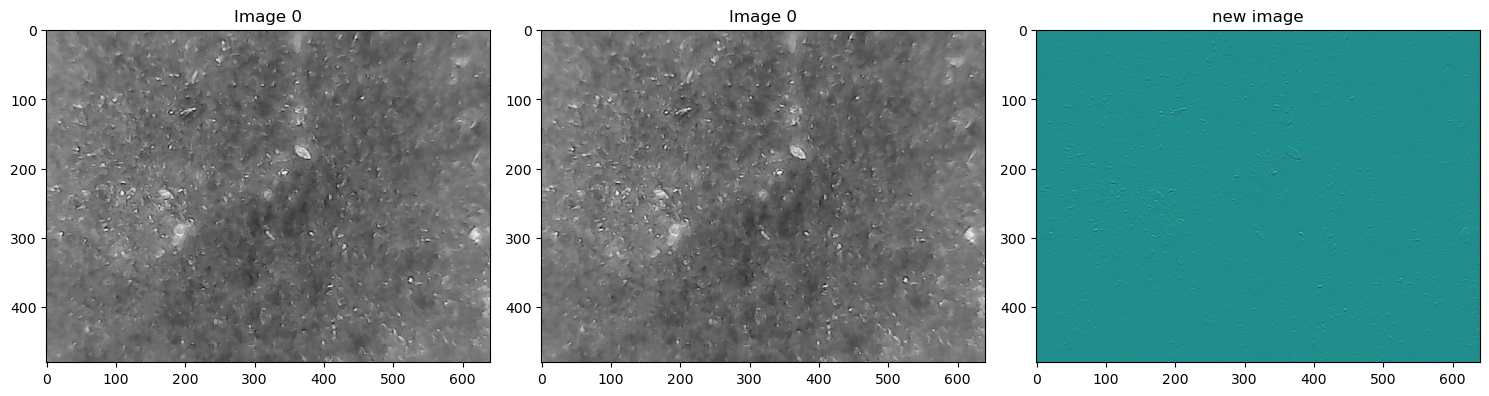

In [8]:
image_save_dir = "/home/adminuser/Documents/cam_test/test6_sequance2/"

for i in range(0,1):
    
    index_1 = 0
    index_2 = i

    image_1_dir = sorted_file_path_motion[index_1]
    image_2_dir = sorted_file_path_motion[index_2]

    image1 = cv2.imread(image_1_dir[0], cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image_2_dir[0], cv2.IMREAD_GRAYSCALE)
    #print(image1.shape)

    new_imege = np.zeros(image1.shape)
    new_imege_1 = np.zeros(image1.shape)
    i=0
    for i in range(0,479):
        new_imege[i+1,:] = image1[i,:]

    new_imege_1 = image2 - new_imege

    image1_rgb = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)


    fig, axes = plt.subplots(1,3 , figsize=(15, 5))  # 1 row, 3 columns
    axes[0].imshow(image1_rgb)
    #axes[0].axis('off')
    axes[0].set_title('Image '+str(index_1))
    axes[1].imshow(image2_rgb)
    #axes[1].axis('off')
    axes[1].set_title('Image '+str(index_2))
    
    axes[2].imshow(new_imege_1)
    #axes[2].axis('off')
    axes[2].set_title('new image')
    
    # Adjust layout for better visualization
    plt.tight_layout()
    plt.savefig(image_save_dir+str(index_1)+str(index_2)+".png")
    # Display the subplots
    #plt.show()


(480, 640)


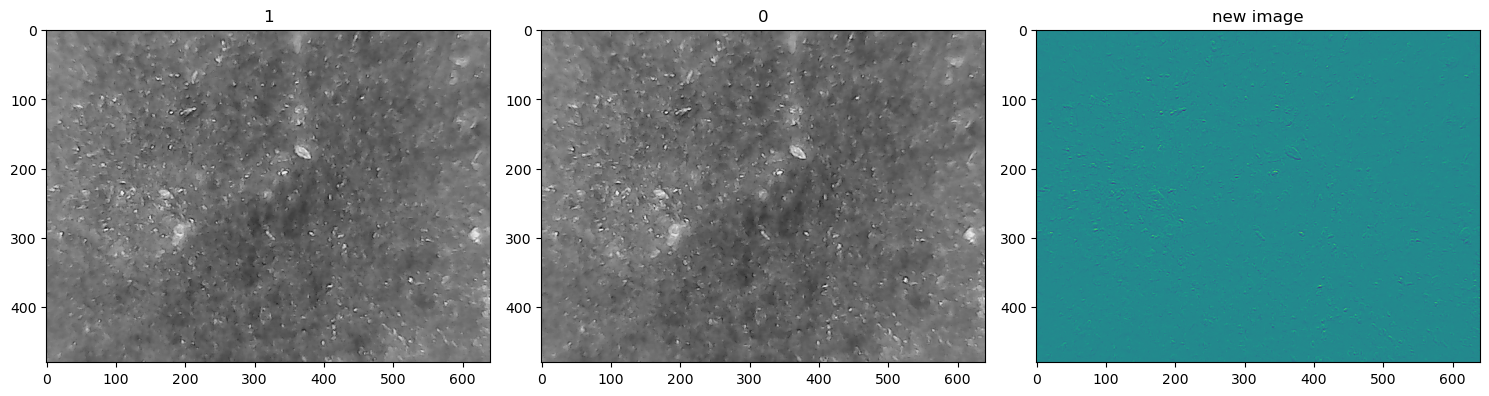

0

In [58]:
image_dif_color(1,0)

(480, 640)


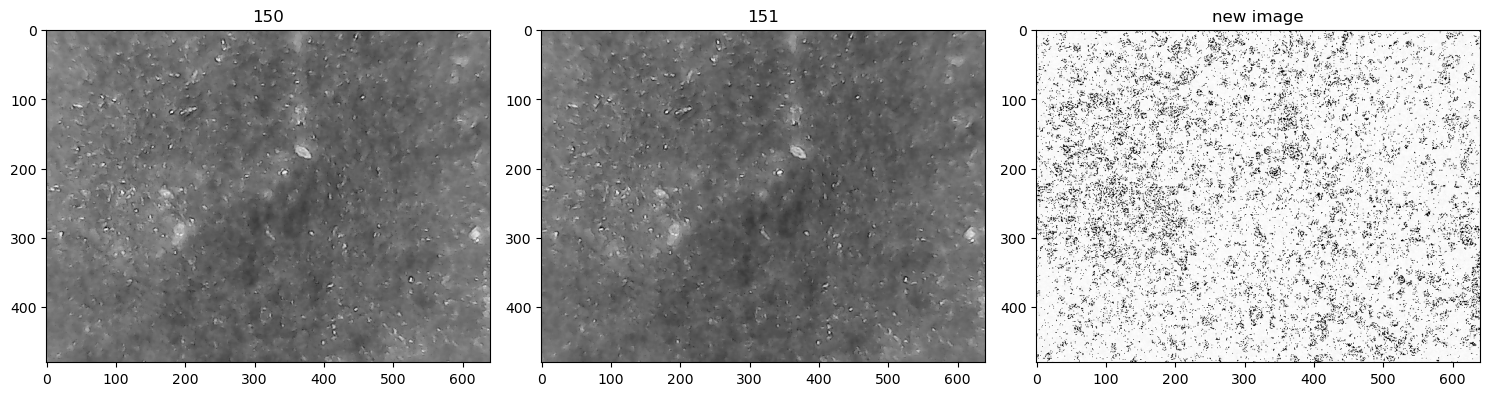

0

In [68]:
image_def_gray(150,151)

### Cuda and Opencv

In [9]:
# Testing with cuda


import pycuda.driver as cuda

cuda.init()
device = cuda.Device(0)  # Select the first CUDA device

capabilities = device.compute_capability()
print(f"CUDA Compute Capability: {capabilities[0]}.{capabilities[1]}")

CUDA Compute Capability: 6.1


### Testing

In [42]:
custom_img = np.zeros((image1.shape[0],image1.shape[1]), dtype=np.uint8)
custom_img[10,:] = 250

In [44]:
# Convert the NumPy matrix to an OpenCV image
opencv_image = cv2.cvtColor(custom_img, cv2.COLOR_GRAY2BGR)  # Convert RGB to BGR

# Display or save the OpenCV image
cv2.imshow('OpenCV Image', opencv_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x5599468f4af0) is not the object's thread (0x5599458b7840).
Cannot move to target thread (0x5599468f4af0)

QObject::moveToThread: Current thread (0x5599468f4af0) is not the object's thread (0x5599458b7840).
Cannot move to target thread (0x5599468f4af0)

QObject::moveToThread: Current thread (0x5599468f4af0) is not the object's thread (0x5599458b7840).
Cannot move to target thread (0x5599468f4af0)

QObject::moveToThread: Current thread (0x5599468f4af0) is not the object's thread (0x5599458b7840).
Cannot move to target thread (0x5599468f4af0)

QObject::moveToThread: Current thread (0x5599468f4af0) is not the object's thread (0x5599458b7840).
Cannot move to target thread (0x5599468f4af0)

QObject::moveToThread: Current thread (0x5599468f4af0) is not the object's thread (0x5599458b7840).
Cannot move to target thread (0x5599468f4af0)

QObject::moveToThread: Current thread (0x5599468f4af0) is not the object's thread (0x5599458b7840).
Cannot move to tar